# TRAINING DATA - COMBINATION OF SYNTHETIC DATA + BORIDES TRAINING DATA (1100 Data points)
# TEST DATA - BORIDES TEST DATA (33 Data Points)
# KNN Model using Bayesian Optimization 

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.9118    | 8.116     |
| 2         | 0.8529    | 19.06     |
| 3         | 0.8529    | 14.91     |
| 4         | 0.8529    | 12.37     |
| 5         | 0.9412    | 3.964     |
| 6         | 0.9412    | 1.0       |
| 7         | 0.9412    | 2.418     |
| 8         | 0.8824    | 5.29      |
| 9         | 0.8529    | 9.773     |
| 10        | 0.9412    | 3.235     |
| 11        | 0.9412    | 1.649     |
| 12        | 0.8824    | 7.14      |
| 13        | 0.9412    | 3.635     |
| 14        | 0.9412    | 2.802     |
| 15        | 0.9412    | 1.292     |
| 16        | 0.9412    | 2.037     |
| 17        | 0.9412    | 3.823     |
| 18        | 0.9412    | 3.014     |
| 19        | 0.9412    | 1.843     |
| 20        | 0.9412    | 1.127     |
| 21        | 0.9412    | 3.436     |
| 22        | 0.9412    | 2.6       |
| 23        | 0.9412    | 2.225     |
| 24        | 0.9412    | 1.472     |
| 25        

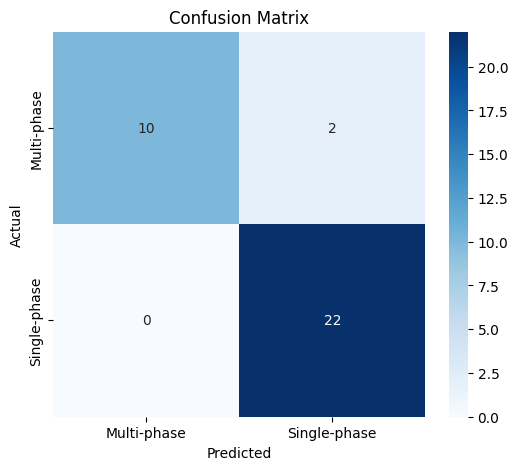

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1100.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def knn_evaluate(n_neighbors):
    n_neighbors = int(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=knn_evaluate,
    pbounds={'n_neighbors': (1, 20)},  # K values between 1 and 20
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=25)

# Get best parameters
best_k = int(optimizer.max['params']['n_neighbors'])
print(f"Best number of neighbors: {best_k}")

# Train optimized KNN model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


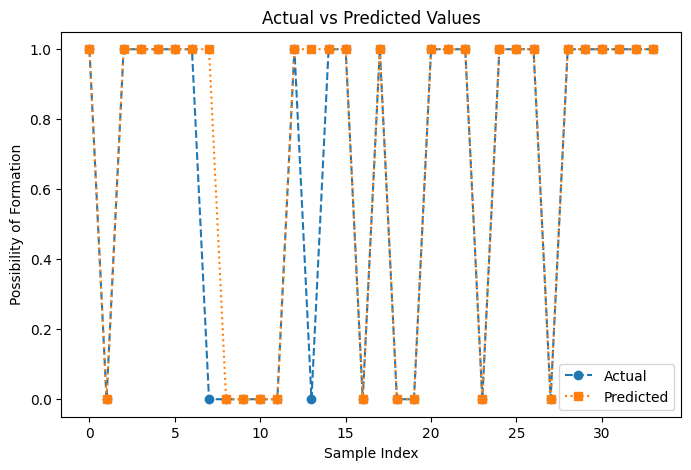

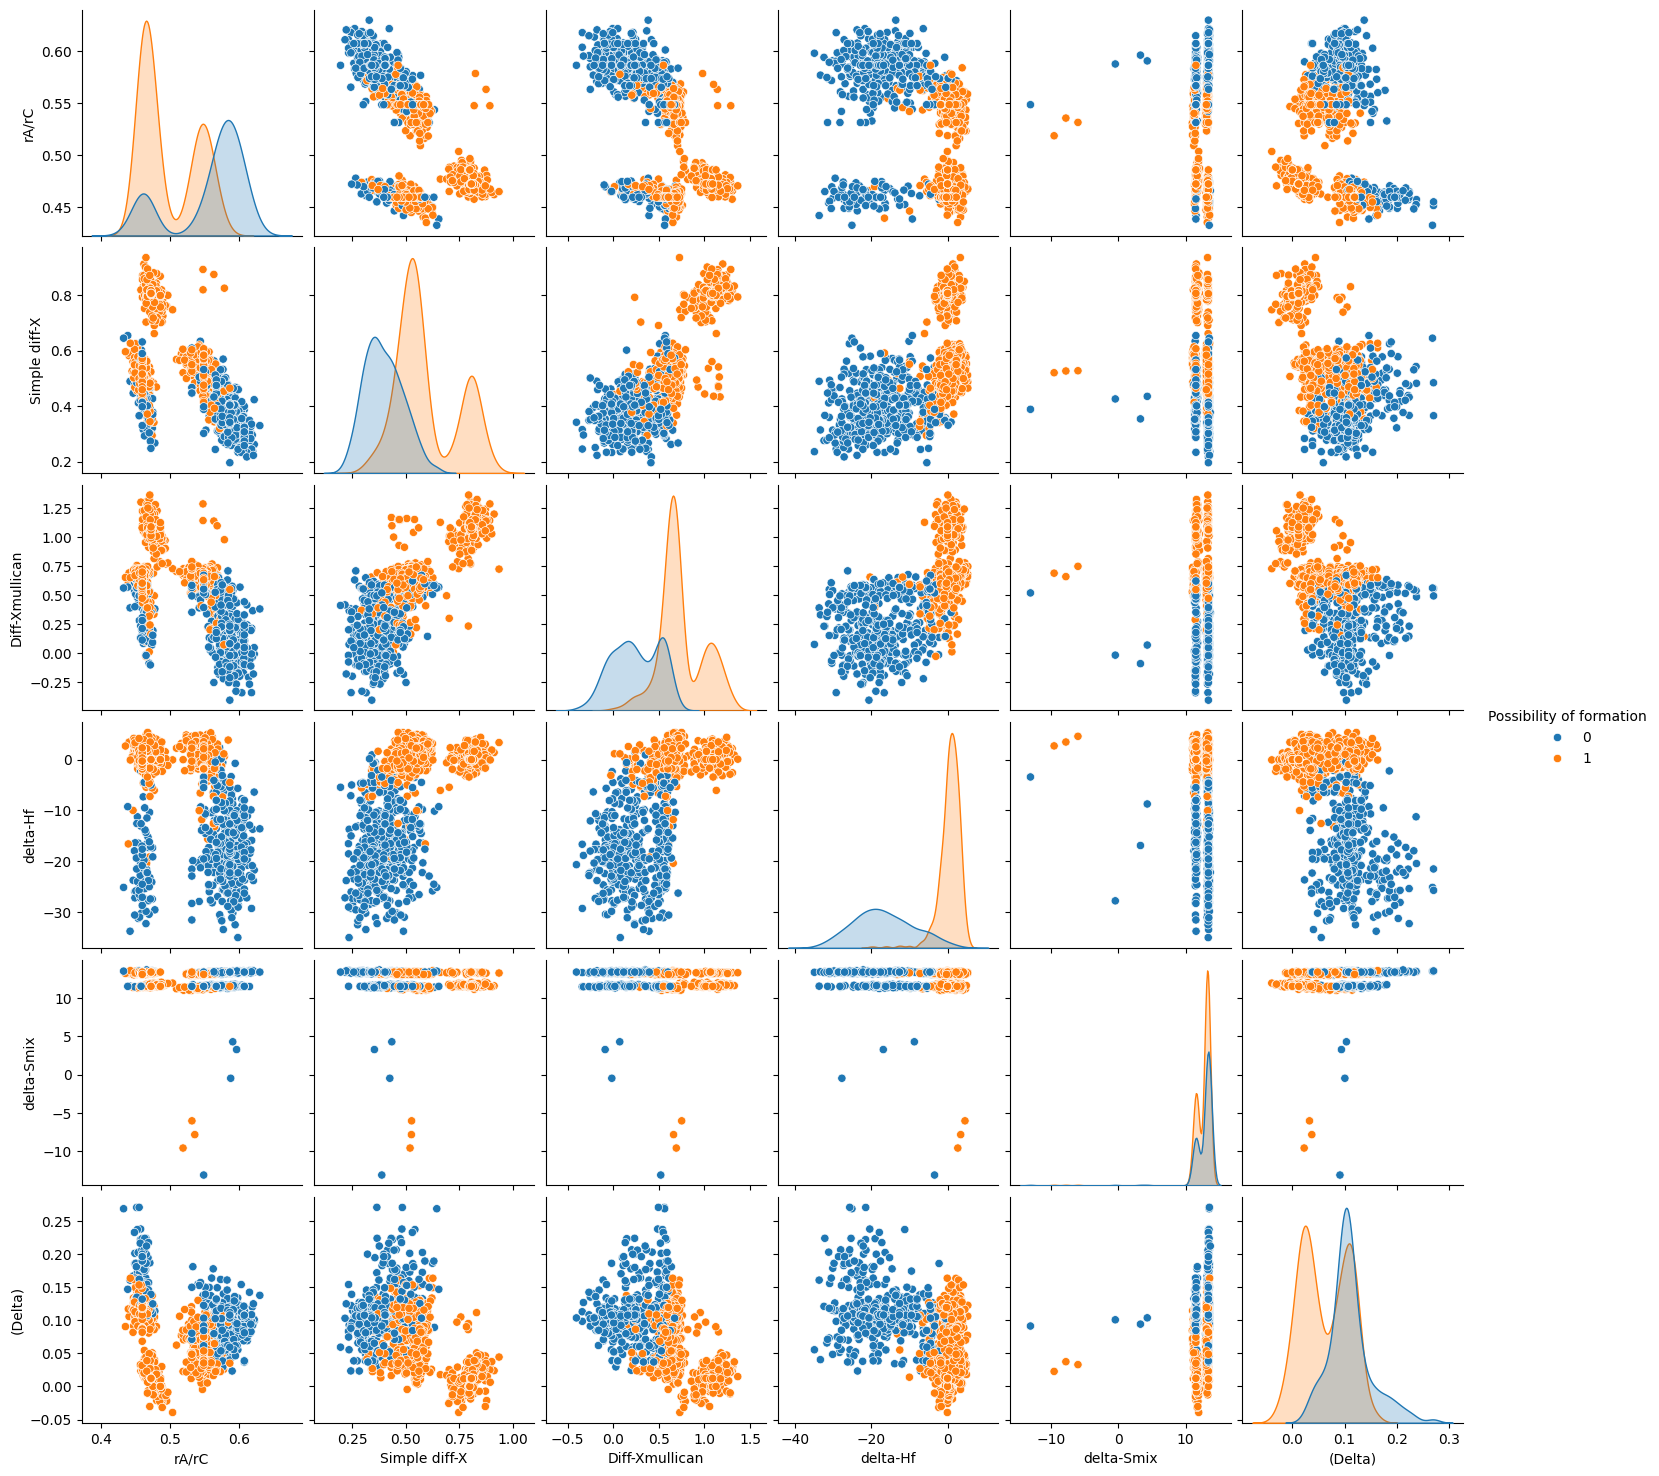

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

def plot_pairplot(df):
    sns.pairplot(df, hue="Possibility of formation", diag_kind="kde")
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)
plot_pairplot(df)

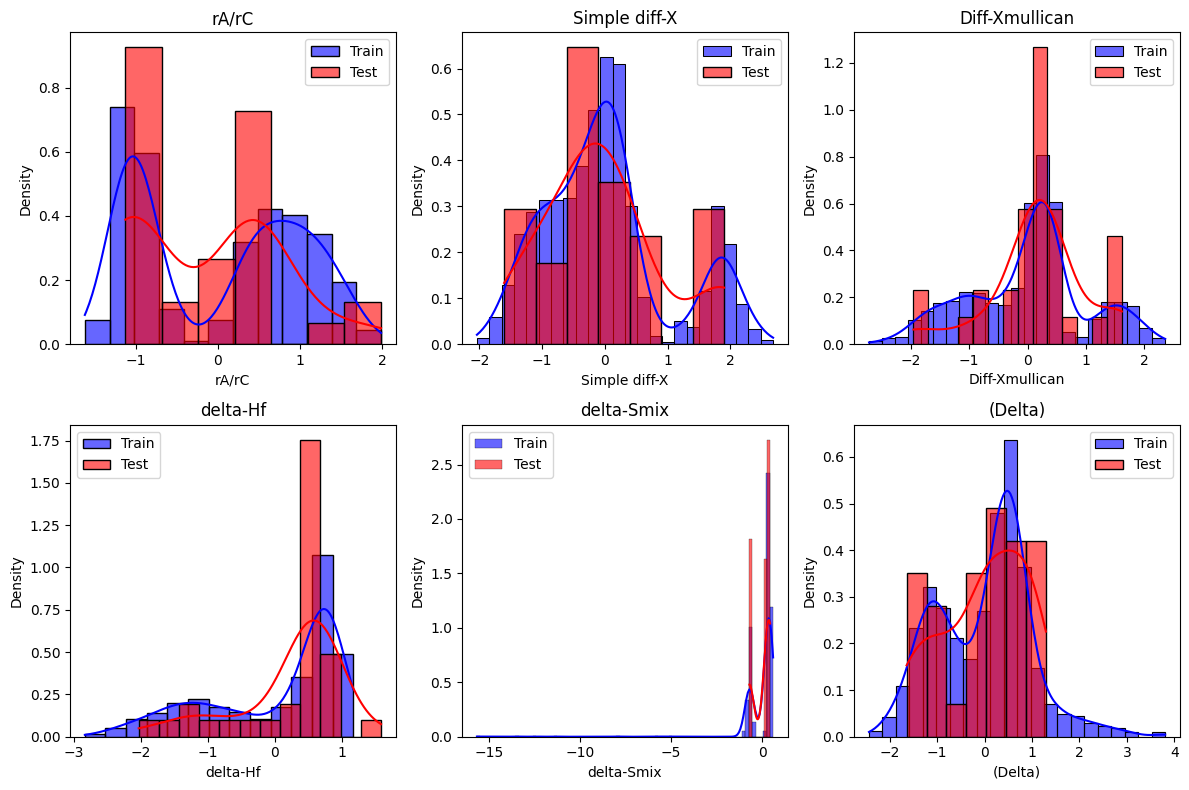

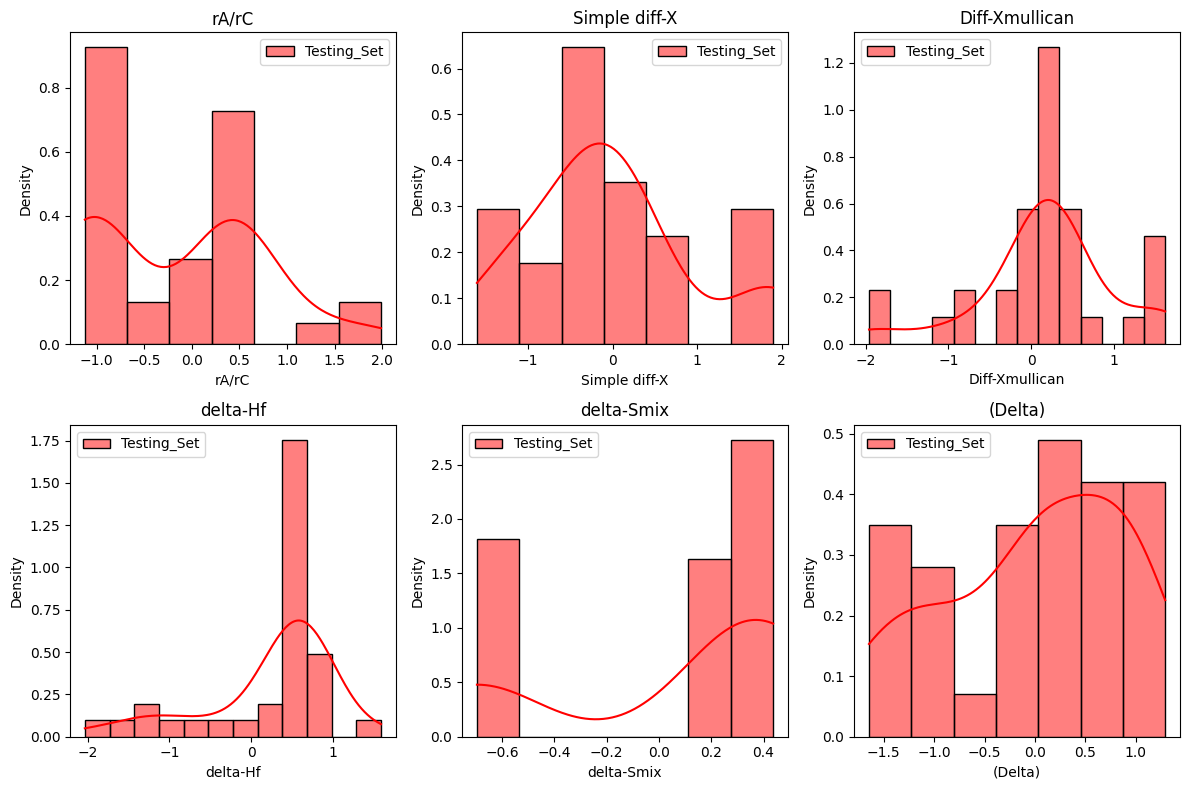

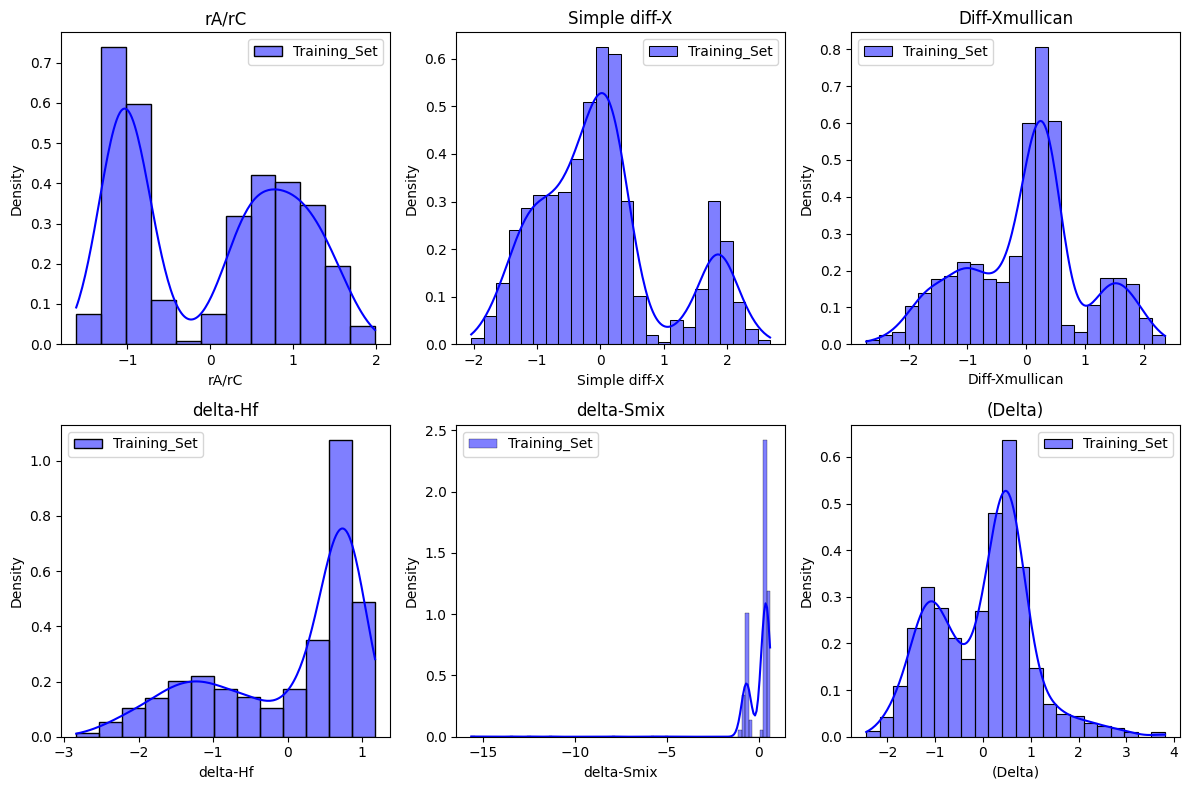

In [25]:
# Function to plot feature distributions (Only for feature columns)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_distributions(original_df):
    feature_columns = original_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(original_df[col], kde=True, color='red', label='Testing_Set', stat='density')
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_feature_distributions_2(original_df):
    feature_columns = original_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(original_df[col], kde=True, color='blue', label='Training_Set', stat='density')
        plt.title(col)
        plt.legend()
    plt.tight_layout()
    plt.show()
# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Function to plot feature distributions for both training and testing datasets
def plot_feature_distributions_combined(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot feature distributions for both train and test datasets
plot_feature_distributions_combined(X_train_df, X_test_df)

# Plot feature distributions
plot_feature_distributions(X_test_df)
plot_feature_distributions_2(X_train_df)

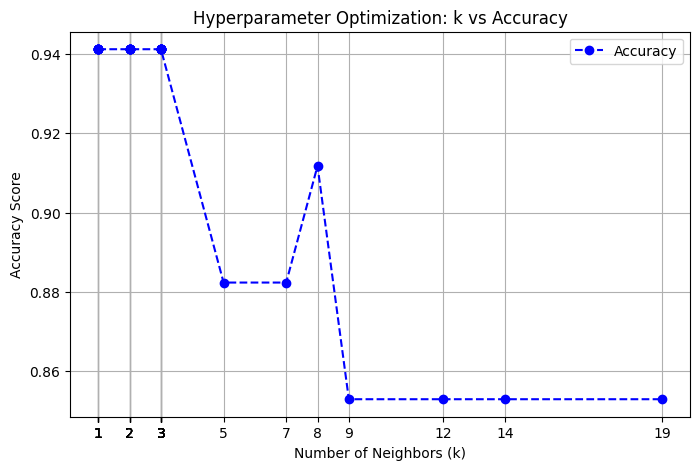

In [14]:
# Extract hyperparameter values and corresponding accuracy scores from Bayesian Optimization
k_values = [int(res["params"]["n_neighbors"]) for res in optimizer.res]
accuracy_scores = [res["target"] for res in optimizer.res]

# Sort values for better visualization
sorted_indices = np.argsort(k_values)
k_values = np.array(k_values)[sorted_indices]
accuracy_scores = np.array(accuracy_scores)[sorted_indices]

# Plot hyperparameter vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("Hyperparameter Optimization: k vs Accuracy")
plt.xticks(k_values)  # Show exact k values on x-axis
plt.grid(True)
plt.legend()
plt.show()


# Random Forest model using bayesian optimization

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.8824    | 81.16     |
| 2         | 0.8824    | 190.6     |
| 3         | 0.8824    | 149.1     |
| 4         | 0.8824    | 123.7     |
| 5         | 0.8824    | 39.64     |
| 6         | 0.8824    | 105.6     |
| 7         | 0.8824    | 43.64     |
| 8         | 0.8824    | 73.77     |
| 9         | 0.8824    | 200.0     |
| 10        | 0.9412    | 10.0      |
| 11        | 0.9118    | 14.52     |
| 12        | 0.9118    | 11.08     |
| 13        | 0.9412    | 10.34     |
| 14        | 0.9118    | 16.03     |
| 15        | 0.9118    | 17.75     |
| 16        | 0.9118    | 19.48     |
| 17        | 0.9118    | 21.27     |
| 18        | 0.8824    | 23.07     |
| 19        | 0.8824    | 170.9     |
| 20        | 0.8824    | 58.69     |
| 21        | 0.8824    | 136.4     |
| 22        | 0.8824    | 93.36     |
| 23        | 0.8824    | 160.0     |
| 24        | 0.9412    | 10.18     |
| 25        

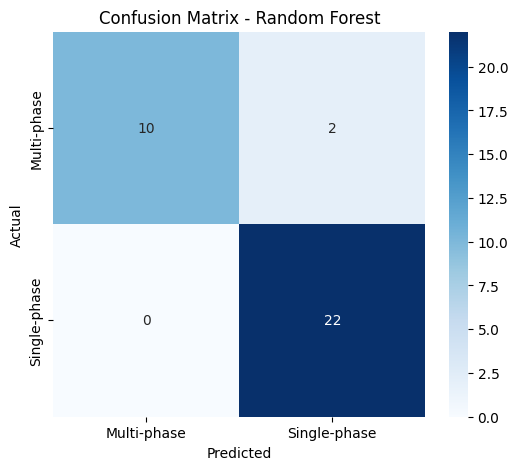

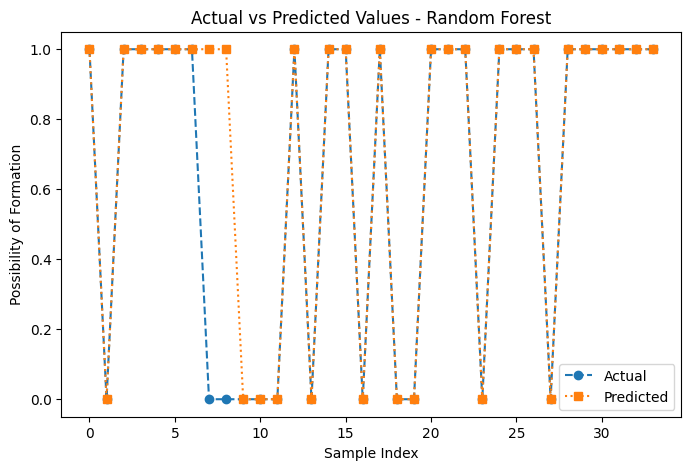

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization

# Load dataset
df = pd.read_csv('samples_1100.csv')
df_test = pd.read_csv('test_set.csv')

# Separate features and target
X = df.drop(columns=["Possibility of formation"])
y = df["Possibility of formation"]

X_train = X
y_train = y
X_test = df_test.drop(columns=["Possibility of formation"])
y_test = df_test["Possibility of formation"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Bayesian Optimization function
def rf_evaluate(n_estimators):
    n_estimators = int(n_estimators)  # Convert float to int
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Define Bayesian Optimizer
optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds={'n_estimators': (10, 200)},  # Number of trees between 10 and 200
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=20)

# Get best parameters
best_n_estimators = int(optimizer.max['params']['n_estimators'])
print(f"Best number of estimators: {best_n_estimators}")

# Train optimized Random Forest model
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Multi-phase", "Single-phase"], 
            yticklabels=["Multi-phase", "Single-phase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Function to plot feature distributions
def plot_feature_distributions(train_df, test_df):
    feature_columns = train_df.columns
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(feature_columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(train_df[col], kde=True, color='blue', label='Train', stat='density', alpha=0.6)
        sns.histplot(test_df[col], kde=True, color='red', label='Test', stat='density', alpha=0.6)
        plt.title(col)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual", marker='o', linestyle='dashed')
    plt.plot(y_pred, label="Predicted", marker='s', linestyle='dotted')
    plt.xlabel("Sample Index")
    plt.ylabel("Possibility of Formation")
    plt.title("Actual vs Predicted Values - Random Forest")
    plt.legend()
    plt.show()

# Convert scaled data to DataFrame for visualization
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred)
